In [1]:
"""
심화 학습: 의사결정 트리와 랜덤 포레스트
랜덤 포레스트 - random forest - 비모수 알고리즘
=> 단순한 추정기들의 결과를 조합하는 앙상블(ensemble) 기법
"""

%matplotlib inline
import numpy as np, matplotlib.pyplot as plt, seaborn as sns; sns.set()

In [2]:
# 랜덤 포레스트의 등장 배경: 의사결정 트리
"""
랜덤 포레스트는 의사결정 트리(decision tree)를 기반으로 한 앙상블 학습 방법(ensemble learner)

의사결정 트리는 객체를 분류하거나 객체 레이블을 예측하는 직관적인 방식
분류상에서 0에 이르도록 설계된 일련의 질문 => 이진 분할
""";

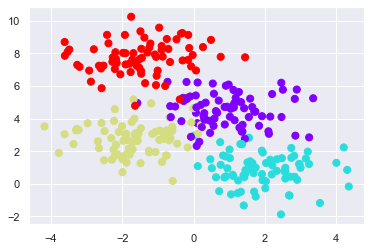

In [3]:
# 의사결정 트리 생성하기

# 4개의 클래스 레이블, 2차원 데이터
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="rainbow");

In [4]:
# 의사결정 트리, SciKit-Learn DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

In [5]:
# 분류기의 결과를 시각화
def visualize_classifier(model, X, y, ax=None, cmap="rainbow"):
    ax = ax or plt.gca()
    
    # 훈련 데이터 점 플로팅
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis("tight")
    ax.axis("off")
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # 모델 적합
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200), np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # 결과를 이용해 컬러 플롯 생성
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(n_classes + 1) -0.5,
                           cmap=cmap,  zorder=1)

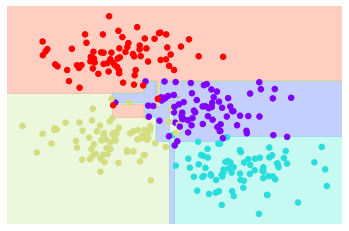

In [6]:
visualize_classifier(DecisionTreeClassifier(), X, y);

In [7]:
# 의사결정 트리와 과적합
"""
트리에서 너무 깊이 들어가서 데이터 분포의 전반적인 특성보다는 특징 데이터의 세부 내역에 적합
데이터의 서로 다른 부분집합에 대해 훈련된 모델을 살펴보기
""";

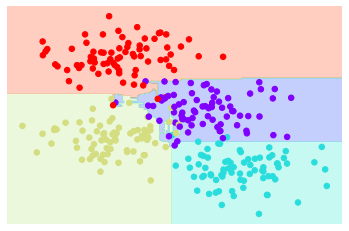

In [8]:
# 추정 모델의 앙상블: 랜덤 포레스트
"""
배깅(Bagging) => 각각이 데이터에 과적합하는 유사한 추정 모델의 앙상블을 사용하고
그 결과를 평균 내어 더 나은 분류를 구한다
=> 임의화 의사결정 트리
"""
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1)
bag.fit(X, y)
visualize_classifier(bag, X, y)

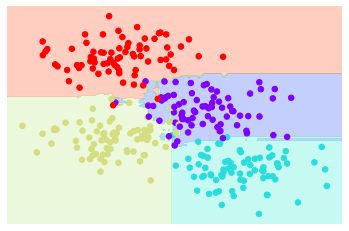

In [9]:
# RandomForestClassifier, 모든 임의화가 자동
# 추정기의 개수 (원하는 경우, 병렬)
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0) # 무작위로 교란된 100개 이상의 모델을 평균
visualize_classifier(model, X, y)

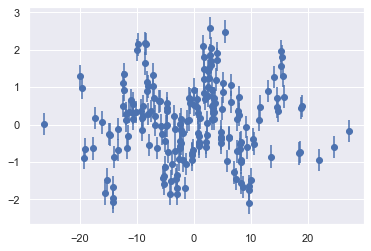

In [12]:
# 랜덤 포레스트 회귀
# RandomForestRegressor

rng = np.random.RandomState(42)
x = 10 * rng.randn(200)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))
    
    return slow_oscillation + fast_oscillation + noise

y = model(x)

plt.errorbar(x, y, 0.3, fmt="o");

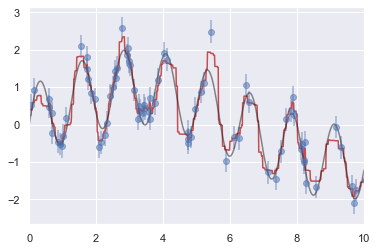

In [16]:
# 랜덤 포레스트 회귀모델을 사용하여 최적의 곡선 그리기
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(200)
forest.fit(x[:, None], y)

xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma=0)

plt.errorbar(x, y, 0.3, fmt="o", alpha=0.5)
plt.plot(xfit, yfit, "-r")
plt.plot(xfit, ytrue, "-k", alpha=0.5)
plt.xlim(0, 10);

# 랜덤 포레스트 모델은 들쭉날쭉한 곡선
# 비모수 랜덤 포레스트 모델은 다중 기간 모델을 지정하지 않고도 데이터를 적합하기에 충분히 유연하다

In [27]:
# 예제: 랜덤 포레스트를 사용한 숫자 분류
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

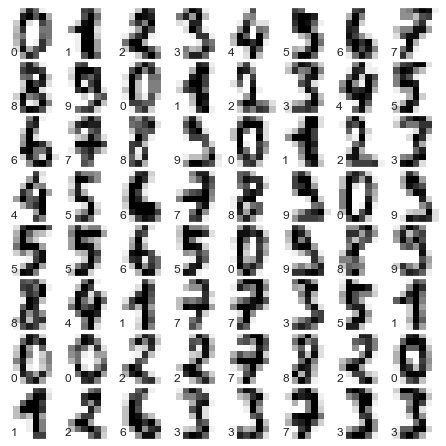

In [38]:
# 처음 몇 개의 데이터 점만 시각화

# 그림(figure) 설정
fig = plt.figure(figsize=(6, 6)) # 그림 크기는 인치 단위
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# 숫자 플로팅: 각 이미지는 8x8픽셀
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation="nearest")
    
# 대상값으로 이미지에 레이블 추가
    ax.text(0, 7, str(digits.target[i]))

In [41]:
# 랜덤 포레스트 숫자 분류
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=0)

model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [47]:
# 분류 보고서 작성 (classification_report)
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       1.00      0.96      0.98        45
           2       0.95      1.00      0.98        42
           3       0.98      0.98      0.98        45
           4       0.97      1.00      0.99        37
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.94      0.98      0.96        46
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



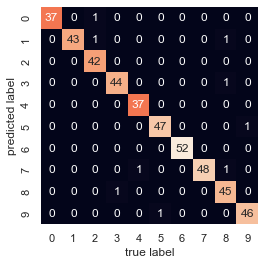

In [49]:
# 오차 행렬 플로팅 (confusion matrix)
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt="d", cbar=False)
plt.xlabel("true label")
plt.ylabel("predicted label");